In [1]:
# Importing libraries and dataset
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style
import numpy as np
import seaborn as sns

plt.style.use('ggplot')

df = pd.read_excel(r'Datasets\AndesVolc.xls')

In [2]:
df_major_ox = df.iloc[ : , 0:13]
df_major_ox.drop(columns= ['K', 'Latitude' ], inplace= True)
df_major_ox.rename( columns= {
                    'S$Andes volcanics' : 'Sample', 
                    'SiO[2]' : 'SiO2',
                    'TiO[2]' : 'TiO2',
                    'Al[2]O[3]' : 'Al2O3',
                    'Na[2]O' : 'Na2O',
                    'K[2]O' : 'K2O',
                    'P[2]O[5]' : 'P2O5'} , inplace= True)
df_major_ox.set_index('Sample', inplace= True)

# Replacing all NaN values with mean
df_major_ox['MnO'].replace(np.nan, np.round(df_major_ox['MnO'].mean()), inplace=True)
df_major_ox['P2O5'].replace(np.nan, np.round(df_major_ox['P2O5'].mean()), inplace=True)

df_major_ox

,SiO2,TiO2,Al2O3,FeO,MnO,MgO,CaO,Na2O,K2O,P2O5
Sample,,,,,,,,,,
NVZ-Su-3D3,43.24,1.720,15.82,11.62,0.232,6.31,14.20,4.43,1.05,1.380
NVZ-Su-3D2,47.56,1.287,18.89,8.99,0.320,2.49,8.63,6.77,4.43,0.640
NVZ-Su-S3,53.43,0.812,19.35,6.85,0.219,2.07,6.26,6.42,4.04,0.535
NVZ-Su-S9,53.54,0.820,19.39,6.77,0.220,2.05,6.26,6.42,3.98,0.540
NVZ-Su-S4,53.95,0.759,19.36,6.36,0.218,1.71,6.09,6.93,4.18,0.457
...,...,...,...,...,...,...,...,...,...,...
AVZ-Lau-L1,66.78,0.590,16.61,3.53,0.000,2.05,4.32,3.76,2.20,0.110
AVZ-Agu-A2,64.36,0.600,16.54,4.01,0.000,2.09,4.93,4.20,2.04,0.240
AVZ-Bur-MB21P,64.49,0.340,18.25,3.42,0.000,2.15,5.39,4.71,0.93,0.210


In [3]:
df_major_ox.isnull().any()    # checking whether a NaN value is present or not in any column

SiO2     False
TiO2     False
Al2O3    False
FeO      False
MnO      False
MgO      False
CaO      False
Na2O     False
K2O      False
P2O5     False
dtype: bool

In [4]:
df_major_ox.describe()

,SiO2,TiO2,Al2O3,FeO,MnO,MgO,CaO,Na2O,K2O,P2O5
count,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000
mean,59.026873,0.905428,16.716155,6.162807,0.112940,3.386295,6.097490,3.972410,2.080777,0.238006
std,5.971611,0.324322,1.509382,2.057440,0.045429,1.891102,2.457601,0.720592,1.089554,0.142153
min,43.240000,0.060000,12.500000,0.690000,0.000000,0.040000,0.450000,2.190000,0.310000,0.000000
25%,53.800000,0.690000,15.820000,4.690207,0.080000,2.102500,4.505000,3.522500,1.060000,0.160000
50%,58.300000,0.900000,16.600000,6.191524,0.110000,3.190000,5.980000,3.960000,2.150000,0.220000
75%,62.700000,1.080000,17.757500,7.754707,0.140000,4.792500,8.050000,4.340000,2.830000,0.284250
max,75.800000,2.560000,22.020000,11.620000,0.320000,14.320000,14.200000,6.930000,5.350000,1.380000


In [5]:
df_major_ox.info()

<class 'pandas.core.frame.DataFrame'>
Index: 502 entries, NVZ-Su-3D3 to AVZ-Cok-CK3-198
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SiO2    502 non-null    float64
 1   TiO2    502 non-null    float64
 2   Al2O3   502 non-null    float64
 3   FeO     502 non-null    float64
 4   MnO     502 non-null    float64
 5   MgO     502 non-null    float64
 6   CaO     502 non-null    float64
 7   Na2O    502 non-null    float64
 8   K2O     502 non-null    float64
 9   P2O5    502 non-null    float64
dtypes: float64(10)
memory usage: 43.1+ KB


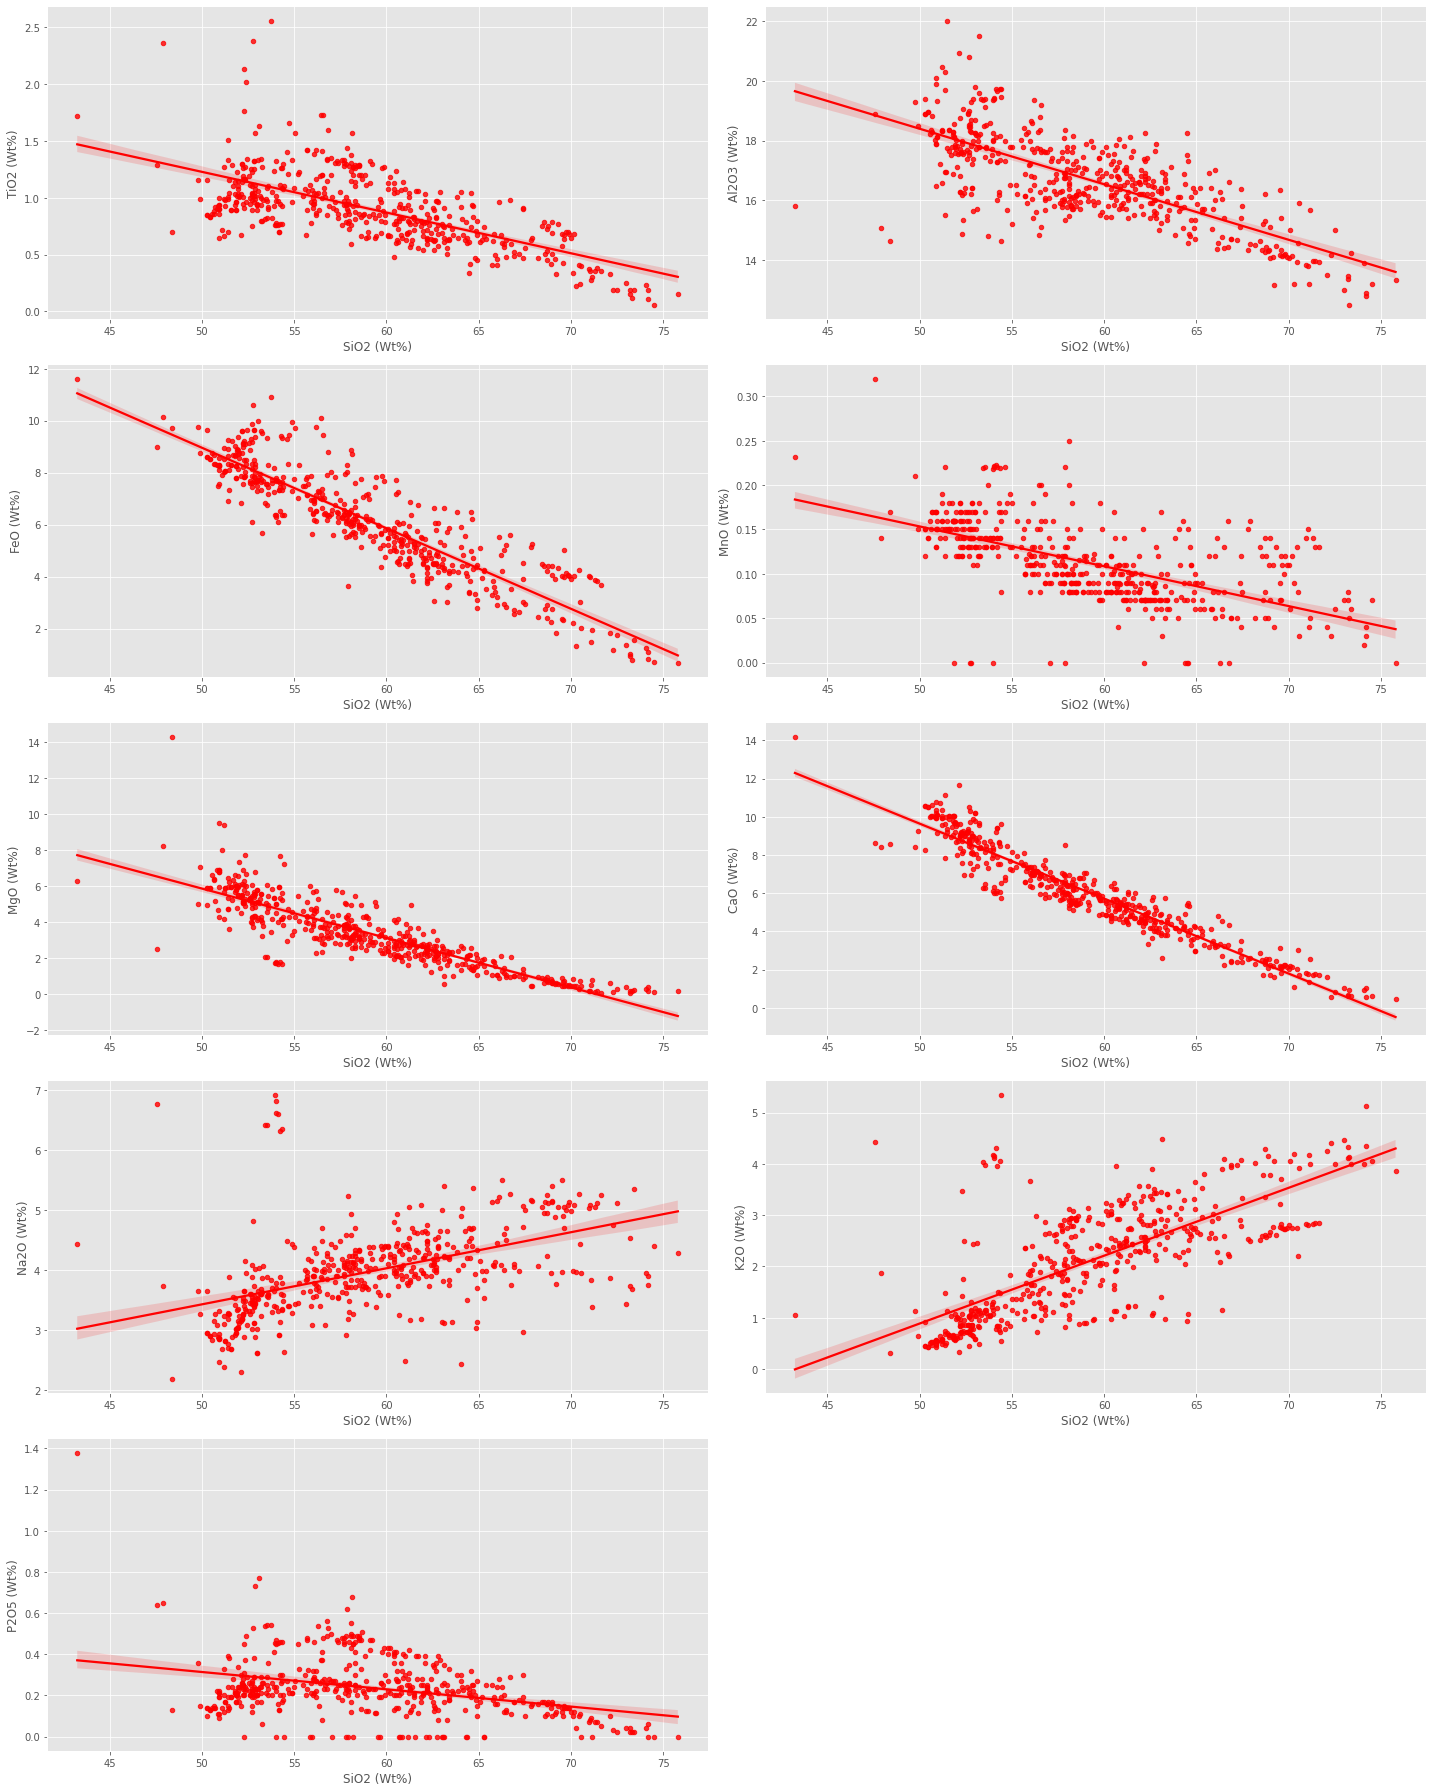

In [6]:
fig , axes = plt.subplots( 5, 2, figsize= (20,25))

x = df_major_ox['SiO2']
lst = df_major_ox.columns.to_list()
i = 1

for pr_ax in axes:     
    for sc_ax in pr_ax:
        #sc_ax.scatter( x, y = df_major_ox[ lst[i] ], s= 25)
        sns.regplot( x = 'SiO2', y = lst[i], data= df_major_ox, ax= sc_ax, color = 'red', scatter_kws= { 's': 20}, fit_reg= True)

        sc_ax.set_ylabel('{} (Wt%)'.format(lst[i]))
        sc_ax.set_xlabel('SiO2 (Wt%)')
        
        i +=1
        if i == len(df_major_ox.columns):
            break

fig.delaxes(axes[4,1])

plt.tight_layout()
plt.show()
        